In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [31]:
df = pd.read_csv('/content/Zoo.csv')
df.head()


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [32]:
## checking null values:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [33]:
## dividing dataset into features and target:
features = df.drop(['animal name', 'type'], axis=1)
target = df['type']
print(features.shape, target.shape)

(101, 16) (101,)


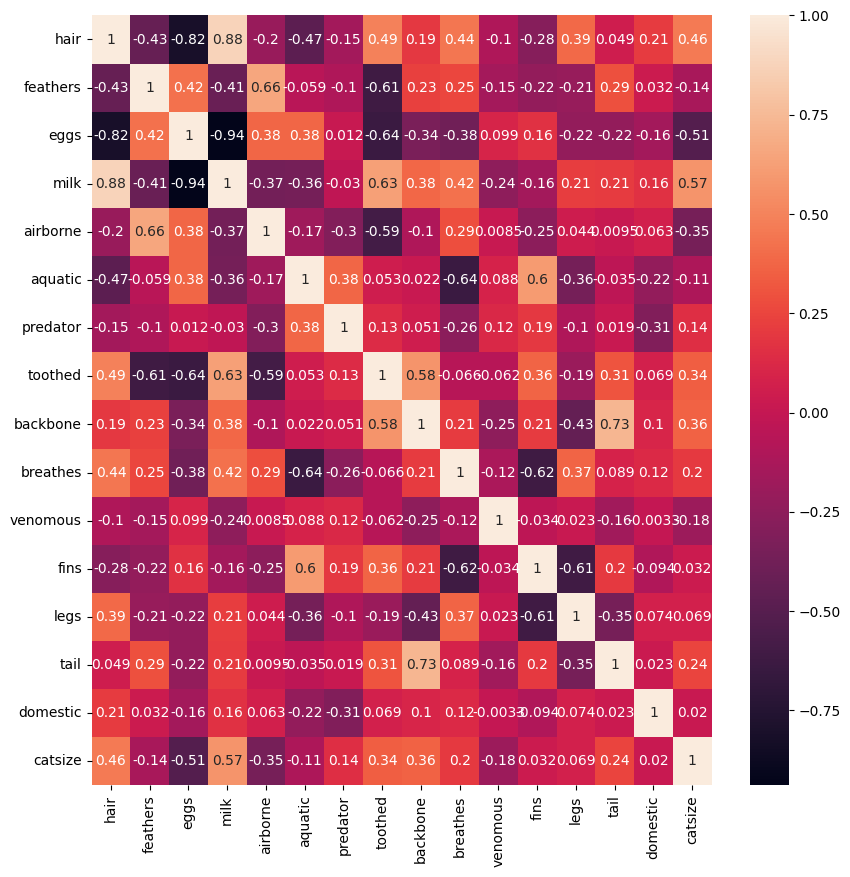

In [34]:
##corelations:
plt.figure(figsize=(10, 10))
sns.heatmap(features.corr(), annot=True)
plt.show()

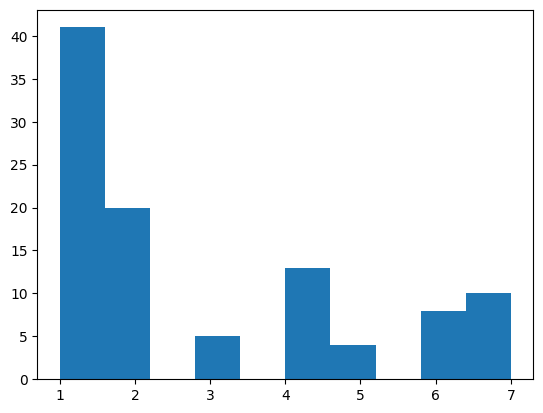

In [35]:
plt.hist(target)
plt.show()

In [36]:
## split data into train test:
x_train,x_test,y_train,y_test = train_test_split(features, target, test_size=0.2, random_state=100)

MODEL BUILDING:

In [37]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [38]:
y_pred = knn.predict(x_test)

In [39]:
##scores:
accuracy_score(y_test, y_pred)

0.8571428571428571

In [40]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}
params

{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [41]:
## Gridsearch for optimum value if K(n_neighbour):
gd = GridSearchCV(knn, params,)

In [42]:
gd = GridSearchCV(knn, params)

In [43]:
gd.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [44]:
gd.best_params_

{'n_neighbors': 2}

In [45]:
x_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
84,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
43,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
28,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
22,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1


In [46]:
## Decision boundaries:
a = np.arange( x_train['legs'].min()-1,  x_train['legs'].max()+1, 0.01)
a.shape

(1000,)

In [47]:
a = np.arange( x_train['legs'].min()-1,  x_train['legs'].max()+1, 0.01)
a.shape

(1000,)

In [48]:
## meshgrid having two features , so we have to fit these features to the knn.
features = df[['legs', 'tail']]
target = df['type']
features.head()

,legs,tail
0,4,0
1,4,1
2,0,1
3,4,0
4,4,1


In [49]:
##splits
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=100)

In [50]:
## fit to the model:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

## Interview answers:
1)
Number of Neighbors (k):Determines the number of nearest neighbors to consider for making predictions.
Leaf Size :Smaller leaf sizes give more accurate results but increase computation time. Larger sizes are faster but may reduce accuracy.
Number of Jobs (n_jobs) :Specifies the number of CPU cores used for computation (-1 uses all available cores).

2)
Use Euclidean Distance for general continuous data.
Use Manhattan Distance if features are on different scales or grid-like data.

Use Minkowski Distance if you want a flexible metric (tunable with p).
Use Hamming Distance for binary or categorical data.
Use Mahalanobis Distance if features are correlated.
Use Cosine Distance for high-dimensional or sparse data.